In [1]:
import torch
import sys
sys.path.append("..")
from diffusers.utils import load_image
from src.sd3_img2img_pipeline import VSFStableDiffusion3Img2ImgPipeline
import json
import judge
import wandb
import numpy as np
import dotenv
dotenv.load_dotenv()
import argparse

In [ ]:
model_id = "stabilityai/stable-diffusion-3.5-large"
pipe = VSFStableDiffusion3Img2ImgPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
init_image = load_image("https://t4.ftcdn.net/jpg/02/52/93/81/360_F_252938192_JQQL8VoqyQVwVB98oRnZl83epseTVaHe.jpg")
init_image = init_image.resize((1024, 1024))

  0%|          | 0/8 [00:00<?, ?it/s]

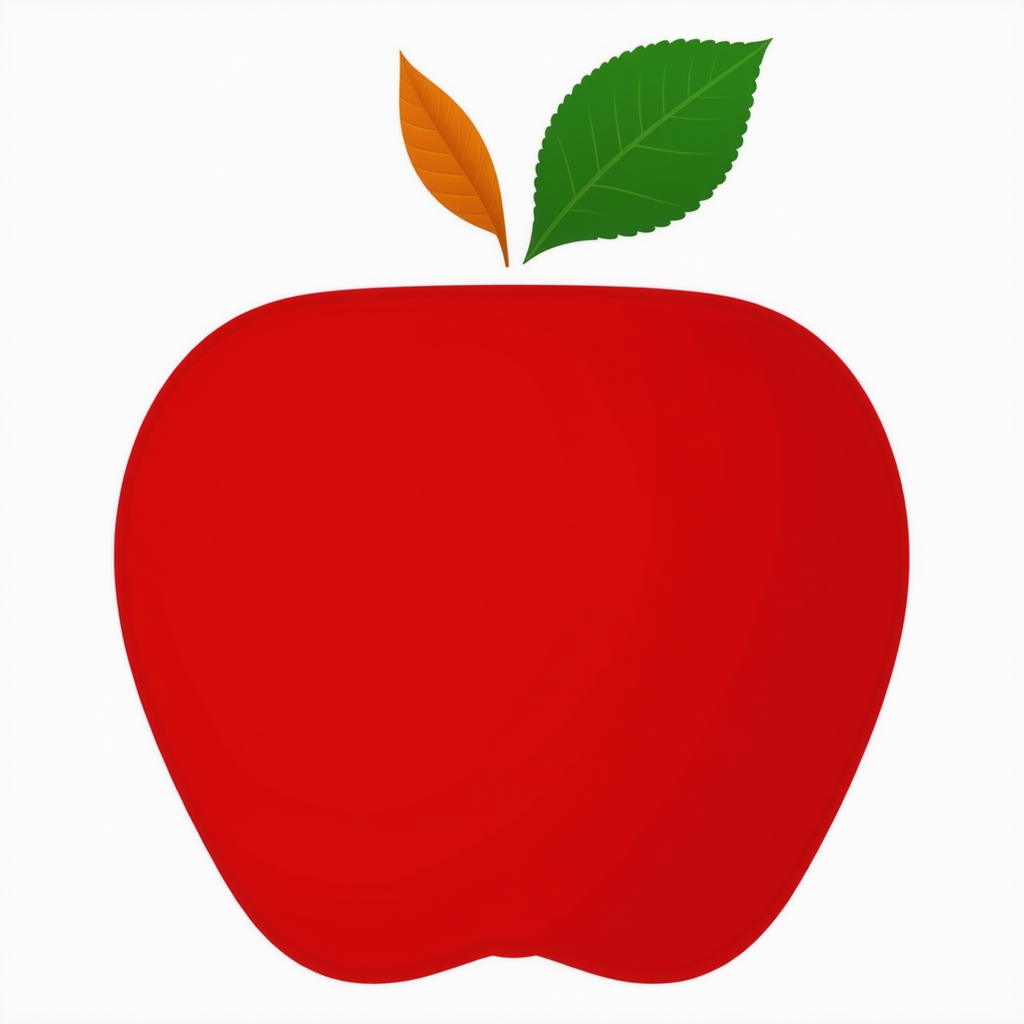

In [ ]:
image = pipe("an orange",
             negative_prompt="red apple",
             image=init_image,
             num_inference_steps=10,
             width=init_image.width,
             height=init_image.height,
             guidance_scale=0.0,
             scale=4,
             offset=0.0,
             strength=0.8).images[0] 
image

In [ ]:
# import torch
# from diffusers import FluxKontextPipeline
# from diffusers.utils import load_image

# pipe = FluxKontextPipeline.from_pretrained("black-forest-labs/FLUX.1-Kontext-dev", torch_dtype=torch.bfloat16)
# pipe.to("cuda")

# init_image = load_image("img.jpg")
# init_image = init_image.resize((init_image.width // 16 * 4, init_image.height // 16 * 4))

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


  0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
# image = pipe(
#   image=init_image,
#   prompt="make these two people having a candle light date, remove beard from the face",
#   guidance_scale=5
# ).images[0]

  0%|          | 0/28 [00:00<?, ?it/s]

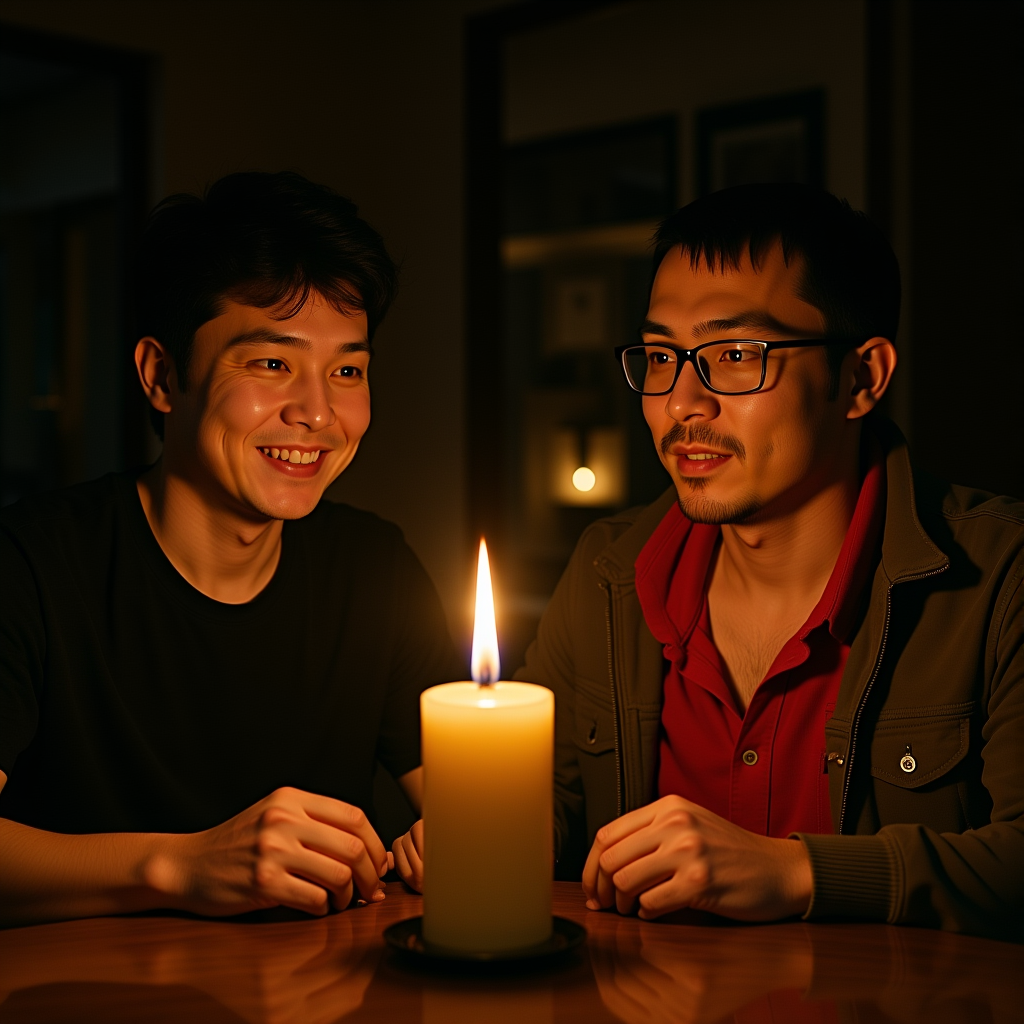

In [10]:
image